# Outliers in Regression Model

## Removing outliers in a regression model increases the regression score


In [1]:
import numpy

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    ### your code goes here
    errors = numpy.asarray((net_worths - predictions)**2)
    cleaned_data = zip(ages, net_worths, errors)
    cleaned_data = sorted(cleaned_data, key=lambda x:x[2], reverse = True)
    limit = int(len(net_worths) * 0.1)#Only 10% percent of data 
    return list(cleaned_data[limit:])

('Slope before cleaning= ', array([[ 5.07793064]]))
('Intercept before cleaning = ', array([ 25.21002155]))
('Score in test data= ', 0.8782624703664671)


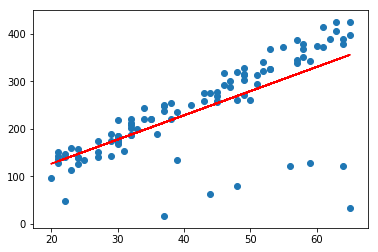

('Score after cleaning = ', 0.95137349076018918)
('Slope after cleaning =  ', array([[ 6.36859481]]))
('Intercept after cleaning = ', array([-6.91861069]))


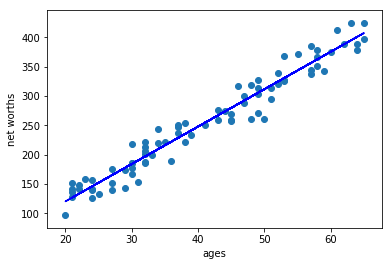

In [3]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )


### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like

from sklearn import linear_model
clf = linear_model.LinearRegression()
reg = clf.fit(ages_train, net_worths_train)
pred = reg.predict(ages_train)

print ("Slope before cleaning= ", reg.coef_)
print ("Intercept before cleaning = ", reg.intercept_)

print ("Score in test data= ", reg.score(ages_test, net_worths_test))

try:
    plt.plot(ages, reg.predict(ages), color="red")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
    ages,net_worths,errors = zip(*cleaned_data)
    reg.fit(ages, net_worths)
    print ("Score after cleaning = ", reg.score(ages, net_worths))
   # print ("Slope after cleaning = ", reg.score(ages, net_worths))
    #print ("Intercept after cleaning = ", reg.score(ages, net_worths))
    print ("Slope after cleaning =  ", reg.coef_)
    print ("Intercept after cleaning = ", reg.intercept_)

    #plt.plot(ages, reg.predict(ages), color="blue")
    #plt.show()
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"

### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()
else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"
